##### Lending Club Data Project

# 2 Exploratory Data Analysis

In [ ]:
reset -fs

In [2]:
#Standard imports
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from scipy import stats
import seaborn as sns

from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from numpy import median, mean

## 2.1 Load Data

In [3]:
pd.set_option("display.max_columns", None)
train_data = pd.read_csv('train_data.csv')
train_data.drop('Unnamed: 0', axis = 1, inplace = True)
train_data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,6000.0,6000.0,36,0.0691,185.02,1.0,6 years,MORTGAGE,26400.0,Verified,2011.0,debt_consolidation,CA,9.27,0.0,0.0,2.0,0.0,1605.0,0.434,9.0,0.0
1,3000.0,3000.0,36,0.1677,106.62,5.0,< 1 year,RENT,10800.0,Verified,2011.0,debt_consolidation,CA,8.89,0.0,1.0,2.0,0.0,2468.0,0.987,4.0,0.0
2,8400.0,8400.0,36,0.0603,255.66,1.0,10+ years,MORTGAGE,50000.0,Not Verified,2011.0,debt_consolidation,TX,7.54,0.0,0.0,8.0,0.0,7029.0,0.149,16.0,1.0
3,10000.0,10000.0,36,0.0751,311.11,1.0,9 years,MORTGAGE,32004.0,Verified,2010.0,other,AZ,0.00,0.0,0.0,7.0,0.0,0.0,0.000,13.0,1.0
4,5000.0,5000.0,36,0.1435,171.74,3.0,< 1 year,RENT,16800.0,Source Verified,2010.0,debt_consolidation,CA,7.86,0.0,1.0,3.0,0.0,3562.0,0.937,10.0,1.0


## 2.2 Overview of descriptives

### Numerical data

In [4]:
train_data.describe().round(2)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
count,23657.00,23657.00,23657.00,23657.00,23657.00,23657.00,23657.00,23657.00,23657.00,23657.00,23657.00,23657.00,23657.00,23657.00,23657.00,23657.00,23657.00
mean,10983.11,10725.49,42.22,0.12,318.41,2.51,65605.20,2010.43,13.31,0.13,0.84,9.12,0.05,12478.73,0.49,21.69,0.86
std,7172.15,6884.92,10.52,0.04,199.09,1.35,37027.23,0.71,6.61,0.42,1.02,4.16,0.22,13493.77,0.28,10.87,0.35
min,1000.00,1000.00,36.00,0.05,22.24,1.00,4080.00,2009.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,3.00,0.00
25%,5200.00,5200.00,36.00,0.09,165.38,1.00,40000.00,2010.00,8.20,0.00,0.00,6.00,0.00,3605.00,0.25,13.00,1.00
50%,9950.00,9600.00,36.00,0.12,278.74,2.00,57996.00,2011.00,13.43,0.00,1.00,8.00,0.00,8575.00,0.49,20.00,1.00
75%,15000.00,15000.00,60.00,0.14,424.67,3.00,80000.00,2011.00,18.60,0.00,1.00,12.00,0.00,16357.00,0.72,28.00,1.00
max,35000.00,35000.00,60.00,0.22,1066.16,7.00,300000.00,2011.00,28.06,3.00,5.00,24.00,1.00,98433.00,0.99,60.00,1.00


### Categorical data

In [5]:
train_data.select_dtypes('object').describe()

,emp_length,home_ownership,verification_status,purpose,addr_state
count,23657,23657,23657,23657,23657
unique,12,4,3,14,46
top,10+ years,RENT,Not Verified,debt_consolidation,CA
freq,5126,11530,9826,11178,4269


## 2.3 EDA: Questions of interest

The central question of this analysis is which borrowers should get a credit and which shouldn't. In other words, investors need information on risk factors and most promising invests. Therefore, this EDA focuses connections between the dependent variable, loan_status, and several predictor variables.

#### Distribution of loan amount

In [6]:
#Definition of bins for loan amount
loan_bins = pd.cut(train_data['loan_amnt'], bins = np.arange(0, 38000, 2000)) #, labels = ['0 - 24 yrs', '25 - 49 yrs', '50 - 74 yrs', '75 - 99 yrs', '>= 100 yrs'])
loan_bins.name = 'loan_bins'
train_data = pd.concat([train_data, loan_bins], axis = 1)

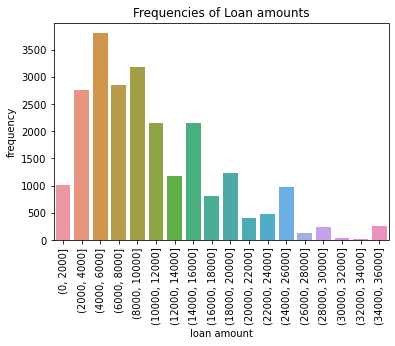

In [7]:
sns.countplot(data = train_data, x = 'loan_bins' ).set(title = 'Frequencies of Loan amounts', xlabel = 'loan amount',ylabel = 'frequency')
plt.xticks (rotation = 90)
plt.savefig('loan_amount.png')

Most borrowers beg for 4000-6000 USD. The distribution is clearly right-skewed.

#### Loan amounts over time

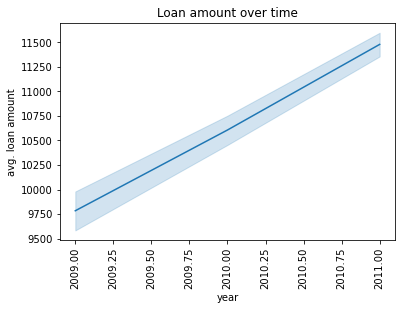

In [8]:
sns.lineplot(data = train_data, y = 'loan_amnt', x = 'issue_d', estimator = mean).set(title = 'Loan amount over time', xlabel = 'year',ylabel = 'avg. loan amount')
plt.xticks (rotation = 90);
plt.savefig('loan_amount_time.png')

The average loan amount has increased over the years. 

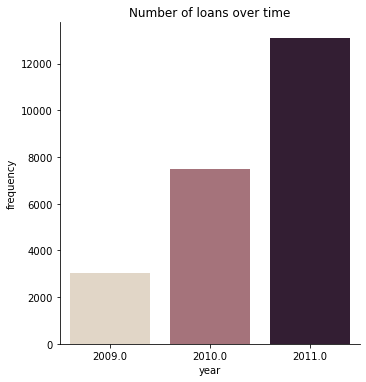

In [9]:
sns.catplot(x="issue_d", kind="count", palette="ch:.25", data=train_data).set(title = 'Number of loans over time', xlabel = 'year',ylabel = 'frequency')
plt.savefig('loans_time.png');

This is also the case for the number of loans. This is not surprising since Lending Club was founded in 2007 and was a 'young' and growing company to that time.

#### Connection between wanted and actually funded loans

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


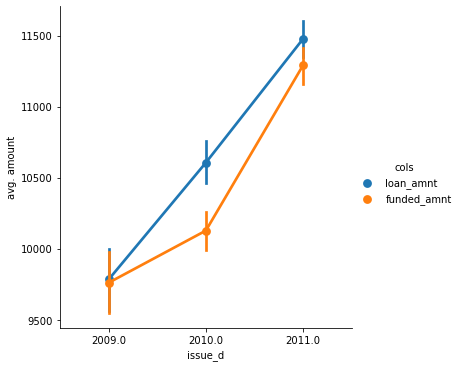

In [10]:
df = train_data[['issue_d', 'loan_amnt', 'funded_amnt']]
df = df.melt('issue_d', var_name = 'cols', value_name = 'avg. amount')
sns.factorplot(x="issue_d", y="avg. amount", hue='cols', data=df);

It is likely that in the early years of lending club, borrowers have had experienced difficulties finding inestors because not many people knew about the platform. Later on, when the platfrom became more established, the loan amount wanted and the invests increasingly correspond.

#### Distribution of interest rates

In [11]:
int_bins = pd.cut(x = train_data.int_rate, bins = np.arange(0, 0.30, 0.05))
int_bins.name = 'int_bins'
train_data = pd.concat([train_data, int_bins], axis = 1)

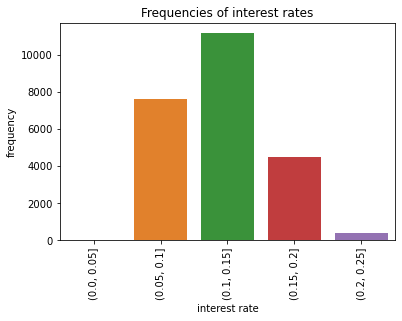

In [12]:
sns.countplot(data = train_data, x = 'int_bins' ).set(title = 'Frequencies of interest rates', xlabel = 'interest rate',ylabel = 'frequency')
plt.xticks (rotation = 90)
plt.savefig('int_rates.png')

Most borrowers have an interest rate between 10 and 15%.

#### Interest rates over time

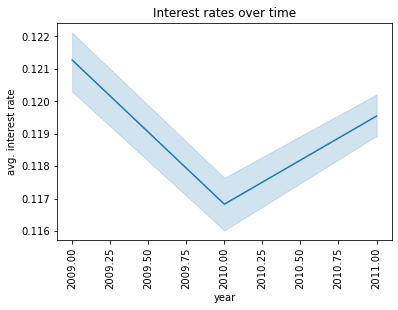

In [13]:
sns.lineplot(data = train_data, y = 'int_rate', x = 'issue_d', estimator = mean).set(title = 'Interest rates over time', xlabel = 'year',ylabel = 'avg. interest rate')
plt.xticks (rotation = 90);
plt.savefig('int_time.png')

Interest rates were decreasing til 2010 and increasing since then. Possibly, decreasing interest rates were a late consequence of the financial crisis in 2008?

### Good vs. bad loans

#### Distribution of loan status

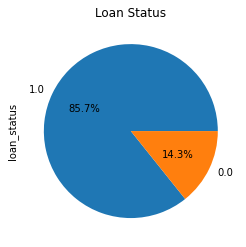

In [14]:
train_data.loan_status.value_counts().plot(kind = 'pie', autopct = '%1.1f%%').set(title = 'Loan Status'); 
plt.savefig('status.png')

The good news for investors is that most borrowers pay fully back. :-)

#### Loan status and grade

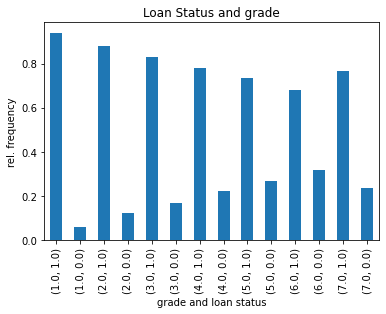

In [15]:
train_data.groupby(["grade"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan Status and grade', xlabel = 'grade and loan status', ylabel = 'rel. frequency');
plt.savefig('status_grade.png')

Not surprisingly, the lower the grade, the more often borrowers do not pay back fully. 

#### Loan status and average loan amount over time

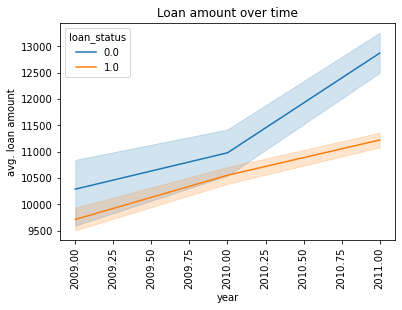

In [16]:
sns.lineplot(data = train_data, y = 'loan_amnt', x = 'issue_d', hue = 'loan_status', estimator = mean).set(title = 'Loan amount over time', xlabel = 'year',ylabel = 'avg. loan amount')
plt.xticks (rotation = 90);
plt.savefig('int_rate_time_status.png')

The loan amount of borrowers who don't pay back the loan has increased more than the amount of 'back-payers'.

#### Loan status and interest rates

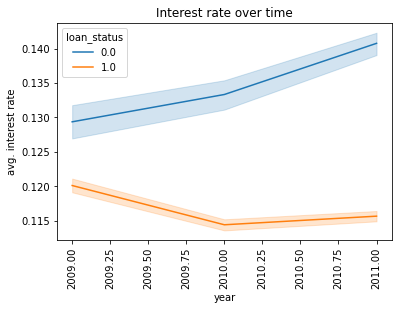

In [17]:
sns.lineplot(data = train_data, y = 'int_rate', x = 'issue_d', hue = 'loan_status', estimator = mean).set(title = 'Interest rate over time', xlabel = 'year',ylabel = 'avg. interest rate')
plt.xticks (rotation = 90);
plt.savefig('int_time_status.png')

The interest rate of borrowers who don't pay back the loan has increased more than the amount of 'back-payers'. This is not surprising since the loans are greater, too.

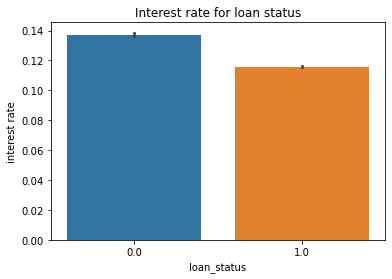

In [18]:
sns.barplot(data = train_data, y = 'int_rate', x = 'loan_status').set(title = 'Interest rate for loan status', xlabel = 'loan_status', ylabel = 'interest rate');
plt.savefig('int_loan.png')

#### Loan status and grade and interest rates

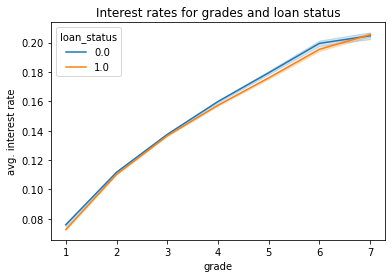

In [19]:
sns.lineplot(data = train_data, y = 'int_rate', x = 'grade', hue = 'loan_status', estimator = mean).set(title = 'Interest rates for grades and loan status', xlabel = 'grade', ylabel = 'avg. interest rate');
plt.savefig('int_rate_grade_status.png')

Legit: The 'worse' a borrower is, the higher interest rates he has to accept. 

#### Loan status over time

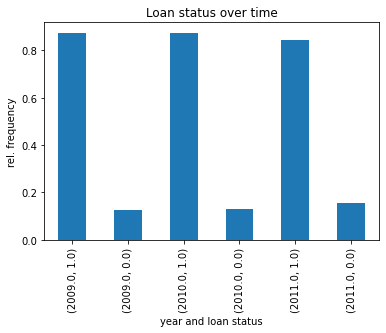

In [20]:
train_data.groupby(["issue_d"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status over time', xlabel = 'year and loan status', ylabel = 'rel. frequency');
plt.savefig('loan_time.png')

The ratio of fully paid/ charged off hasn't changed over time.

#### Annual income over time

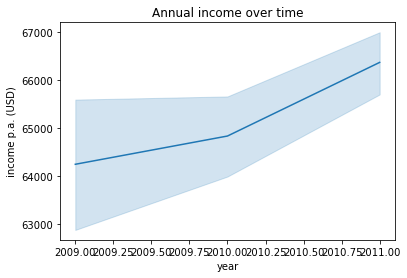

In [21]:
sns.lineplot(data = train_data, y = 'annual_inc', x = 'issue_d', estimator = mean).set(title = 'Annual income over time', xlabel = 'year',ylabel = 'income p.a. (USD)');
plt.savefig('income_time.png')

The annual income has increased.

#### Loan status and income over time

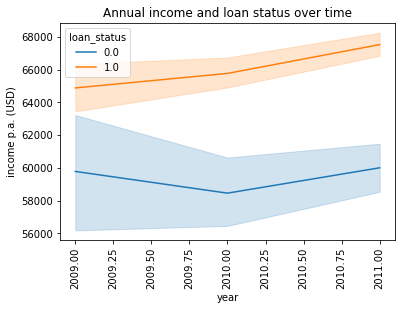

In [22]:
sns.lineplot(data = train_data, y = 'annual_inc', x = 'issue_d', hue = 'loan_status', estimator = mean).set(title = 'Annual income and loan status over time', xlabel = 'year',ylabel = 'income p.a. (USD)')
plt.xticks (rotation = 90);
plt.savefig('income_status_time.png')

Charged-off borrowers have a lower income than those who pay back fully. This difference has increased til 2010. It's reasonable that people having financial problems experience greater difficulties to service a loan. 

#### Dept/ income ratio and loan status

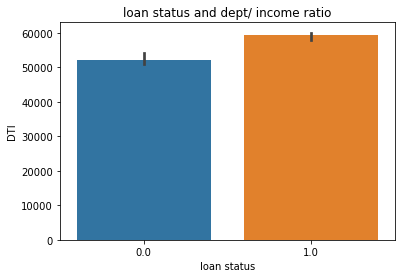

In [23]:
sns.barplot(data = train_data, y = 'annual_inc', x = 'loan_status', estimator =  median).set(title = 'loan status and dept/ income ratio', xlabel = 'loan status',ylabel = 'DTI');
plt.savefig('dti_loanstatus.png')

People who fully pay back have a greater income (see above) and use a higher proportion of that income to service their loan.

In [24]:
dti_bins = pd.cut(x = train_data.dti, bins = np.arange(0, 0.4, 0.1))
dti_bins.name ='dti_bins'
train_data = pd.concat([train_data, dti_bins], axis = 1)

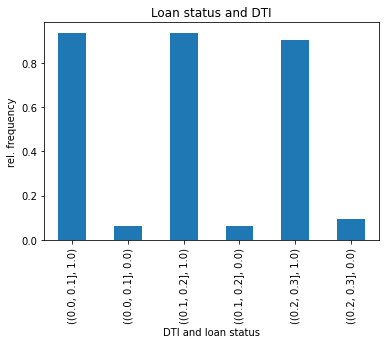

In [25]:
train_data.groupby(["dti_bins"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and DTI', xlabel = 'DTI and loan status', ylabel = 'rel. frequency');
plt.savefig('dti_bins_loan.png')

DTI ratios of charged off/ fully paid haven't changed over time.

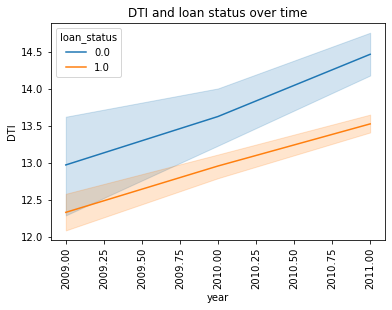

In [26]:
sns.lineplot(data = train_data, y = 'dti', x = 'issue_d', hue = 'loan_status', estimator = mean).set(title = 'DTI and loan status over time', xlabel = 'year',ylabel = 'DTI')
plt.xticks (rotation = 90);
plt.savefig('dti_loanstatus_time.png')

#### Loan status and annual income

In [27]:
inc_bins = pd.cut(x = train_data.annual_inc, bins = np.arange(0, 320000, 50000))
inc_bins.name = 'inc_bins'
train_data = pd.concat([train_data, inc_bins], axis = 1)

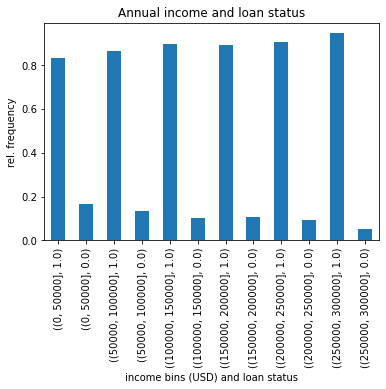

In [28]:
train_data.groupby(["inc_bins"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Annual income and loan status', xlabel = 'income bins (USD) and loan status',ylabel = 'rel. frequency')
plt.xticks (rotation = 90);
plt.savefig('income_status_time.png')

#### Loan status and working time for employer

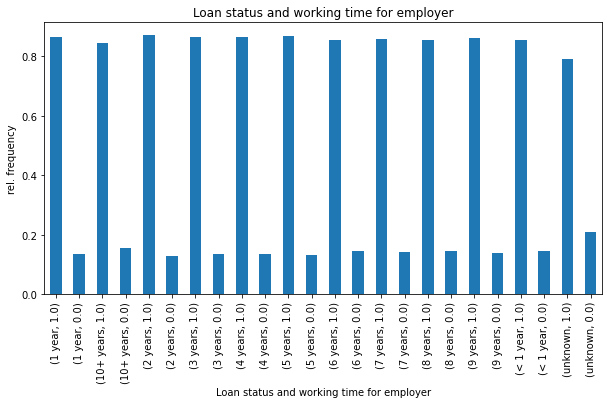

In [29]:
plt.figure(figsize = (10, 5))
train_data.groupby(["emp_length"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and working time for employer', xlabel = 'Loan status and working time for employer', ylabel = 'rel. frequency');

No influence of working time for employer on the probability that a loan is serviced. 

#### Loan status and verification status

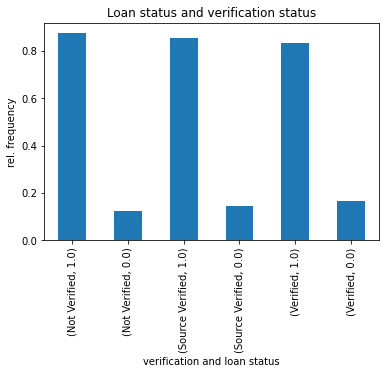

In [30]:
train_data.groupby(["verification_status"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and verification status', xlabel = 'verification and loan status', ylabel = 'rel. frequency');
plt.savefig('verification_loanstatus.png')

No influence of verification status for employer on the probability that a loan is serviced. 

#### Loan status and term

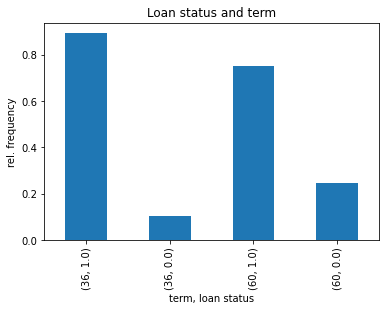

In [31]:
train_data.groupby(["term"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and term', xlabel = 'term, loan status', ylabel = 'rel. frequency');
plt.savefig('term.png')

The proportion of charged off loans is higher when the term is higher.

#### Loan status and home ownership

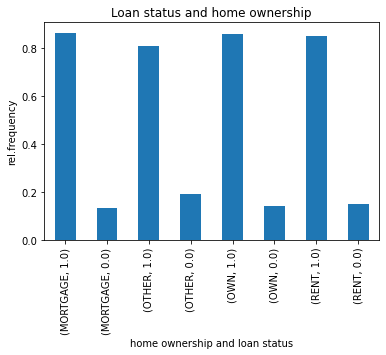

In [32]:
train_data.groupby(["home_ownership"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and home ownership', xlabel = 'home ownership and loan status', ylabel = 'rel.frequency');
plt.savefig('home_loan.png')

No influence of home ownership on the probability that a loan is serviced. 

In [33]:
#!pip install geopandas==0.3.0
#!pip install pyshp==1.2.10
#!pip install shapely==1.6.3

In [34]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
train_data['state_count'] = train_data['addr_state'].groupby(train_data['addr_state']).transform('count')
data = dict(type='choropleth',
            locations = train_data['addr_state'],
            locationmode = 'USA-states',
            colorscale = 'blues',
            #text = train_data['loan_status'],
            z = train_data['state_count'],
            colorbar = {'title':"State Count"}
            )
layout = dict(title = 'State Location in USA Map',
              geo = dict(scope='usa')
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

#### Loan status and inquiries in the last 6 months

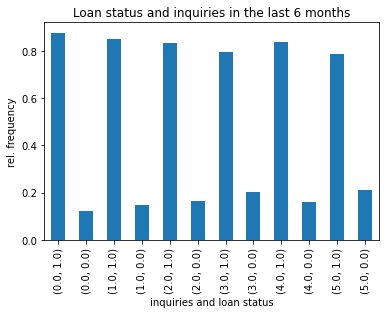

In [41]:
train_data.groupby(["inq_last_6mths"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and inquiries in the last 6 months', xlabel = 'inquiries and loan status', ylabel = 'rel. frequency');
plt.savefig('inq_loan.png')

No influence of inquiries in the last 6 months on the probability that a loan is serviced. 

#### Loan status and number of derogatory public records

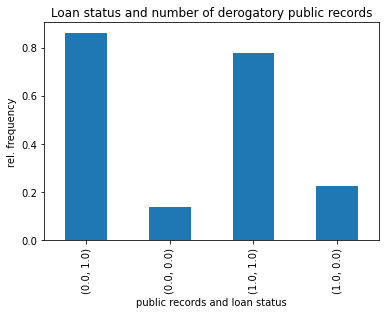

In [42]:
train_data.groupby(["pub_rec"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and number of derogatory public records', xlabel = 'public records and loan status', ylabel = 'rel. frequency');
plt.savefig('pub_rec_loan.png')

Only a small influence of the number of derogatory public on the probability that a loan is serviced. 

#### Loan status and purpose

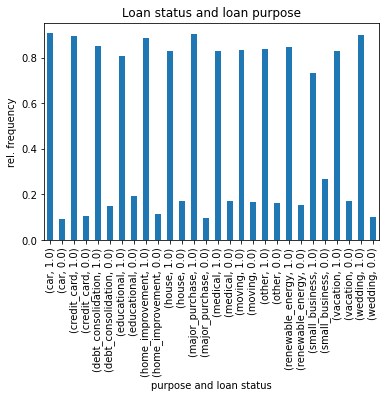

In [43]:
train_data.groupby(["purpose"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and loan purpose', xlabel = 'purpose and loan status', ylabel = 'rel. frequency');
plt.savefig('purpose_loan.png')

No systematic influence of loan purpose on the probability that a loan is serviced. 

#### Loan status and total number of credit lines

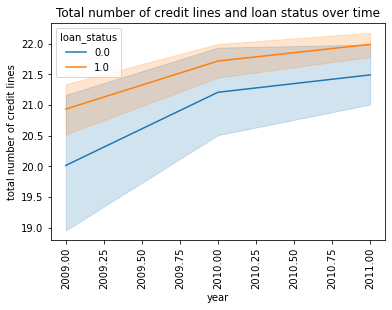

In [44]:
sns.lineplot(data = train_data, y = 'total_acc', x = 'issue_d', hue = 'loan_status', estimator = mean).set(title = 'Total number of credit lines and loan status over time', xlabel = 'year',ylabel = 'total number of credit lines')
plt.xticks (rotation = 90);
#plt.savefig('openacc_loanstatus_time.png')

No systematic influence of the number of credit lines on the probability that a loan is serviced. 

### Loan status and number of open credit files 

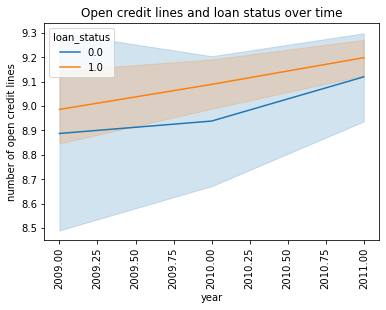

In [45]:
sns.lineplot(data = train_data, y = 'open_acc', x = 'issue_d', hue = 'loan_status', estimator = mean).set(title = 'Open credit lines and loan status over time', xlabel = 'year',ylabel = 'number of open credit lines')
plt.xticks (rotation = 90);
plt.savefig('openacc_loanstatus_time.png')

## 02.05 Overall correlations of numerical variables

For feature engineering, it is important to know which predictive variables correlate (--> multicollinearity). Therefore, a heatmap with correlations is displayed below.

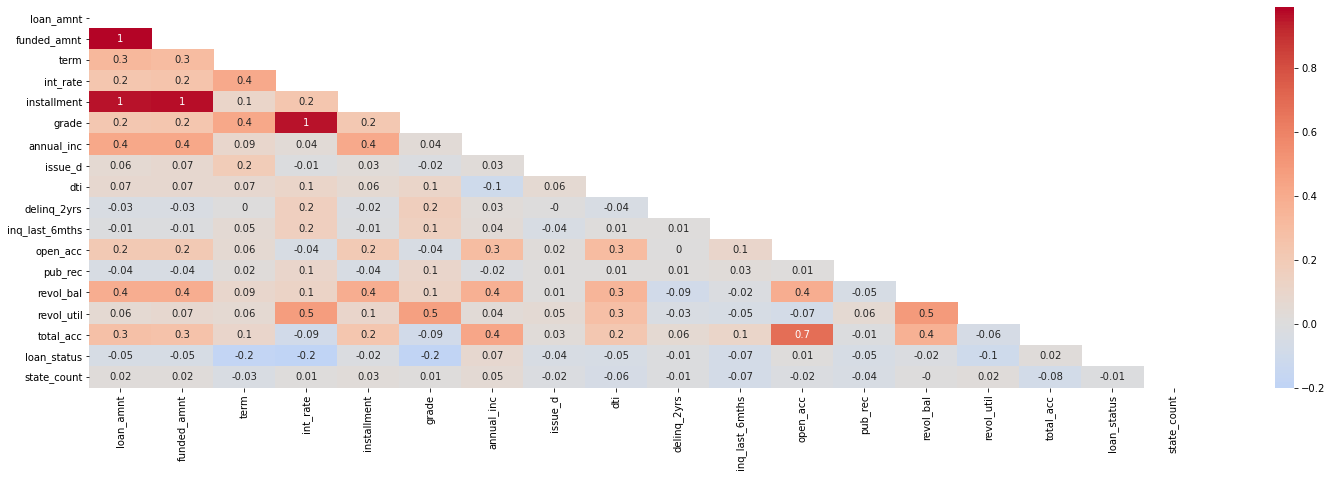

In [46]:
#heat map with correlations
plt.figure(figsize=(25, 7))
mask = np.triu(train_data.corr(method = 'spearman'))
sns.heatmap(train_data.corr(method = 'spearman').round(2), 
            annot = True, 
            fmt='.1g', 
            center= 0, 
            cmap= 'coolwarm', 
            mask = mask);

In general, correlations of independent and target variable are at most small. Therefore, it might be difficult to identify a good model. 
Another problem arises considering autocorrelations of independent variables: some variables are highly correlated, resulting in multicollinearity.